In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
df=pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [121]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

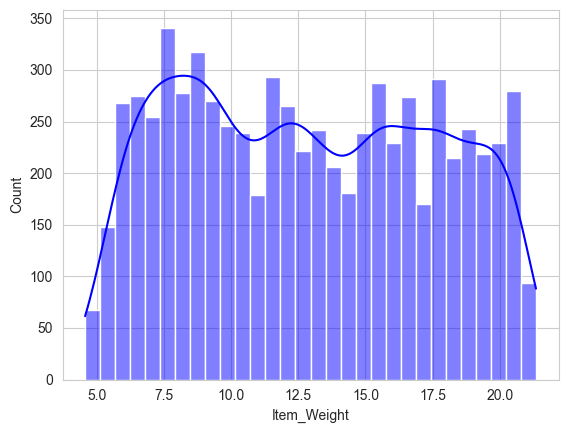

In [122]:

sns.histplot(df['Item_Weight'], bins=30, kde=True, color='blue', alpha=0.5)
plt.show()


/var/folders/73/mpjtryh12nj3xz35btdcvkwr0000gn/T/ipykernel_68662/3254451460.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Outlet_Size'], data=df, palette='Set2')


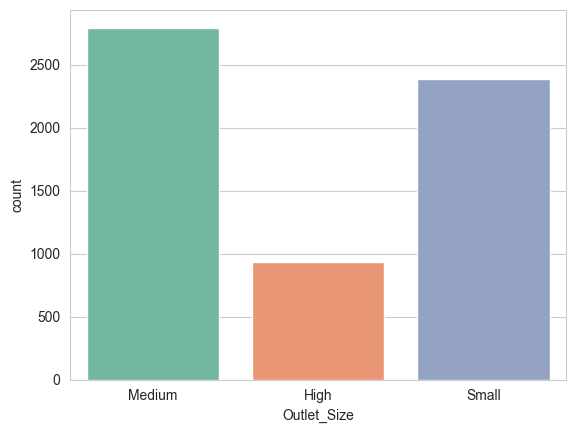

In [123]:
sns.countplot(x=df['Outlet_Size'], data=df, palette='Set2')
plt.show()

In [124]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


/var/folders/73/mpjtryh12nj3xz35btdcvkwr0000gn/T/ipykernel_68662/1315657354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [125]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

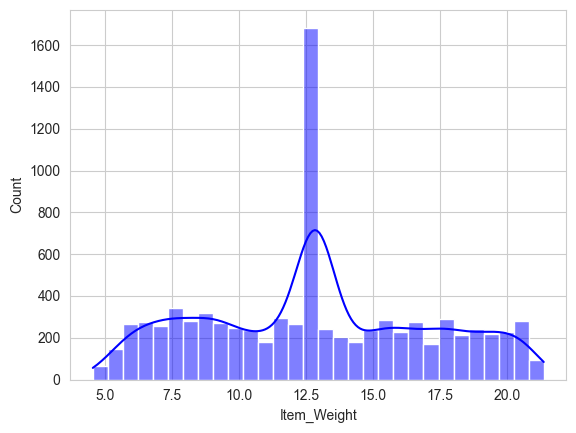

In [126]:
sns.histplot(df['Item_Weight'], bins=30, kde=True, color='blue', alpha=0.5)
plt.show()

In [127]:
pivot = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(pivot)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [128]:
miss_values = df['Outlet_Size'].isnull() 
df.loc[miss_values, 'Outlet_Size'] =df.loc[miss_values,'Outlet_Type'].apply(lambda x: pivot[x])

In [129]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

/var/folders/73/mpjtryh12nj3xz35btdcvkwr0000gn/T/ipykernel_68662/3473348306.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


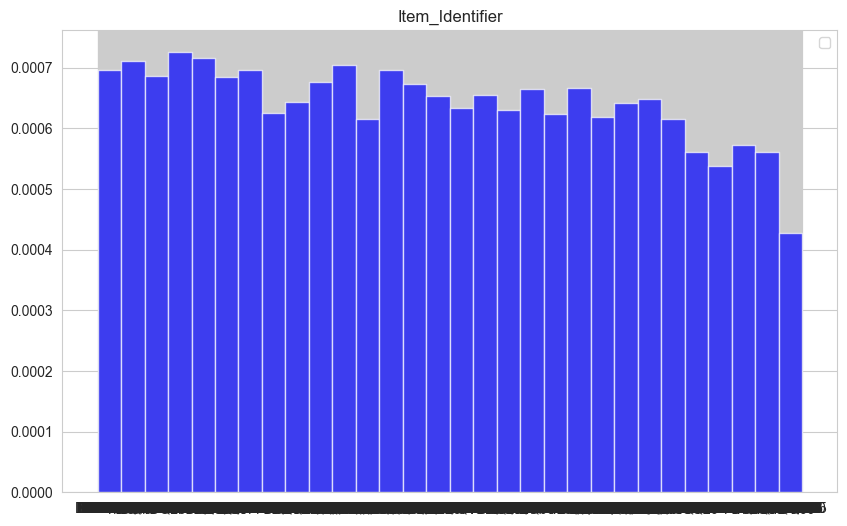

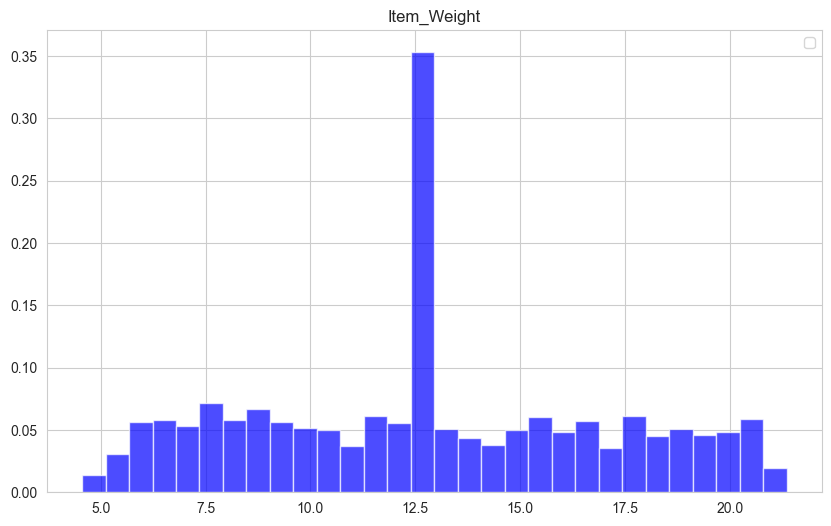

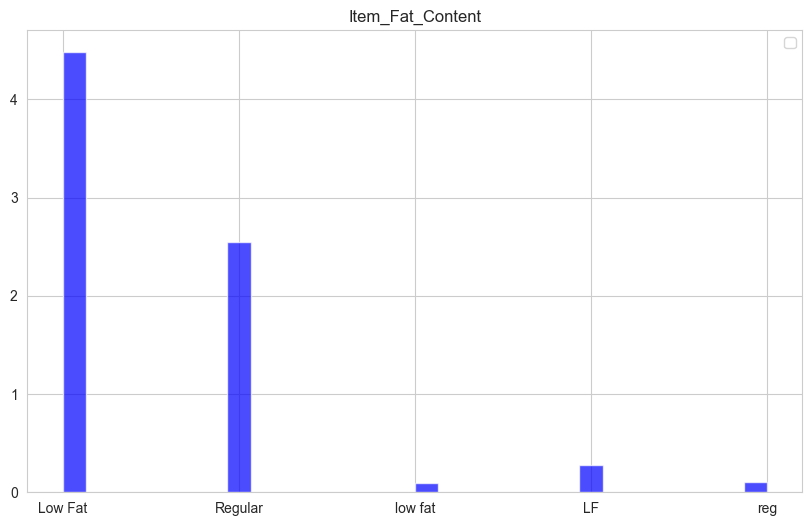

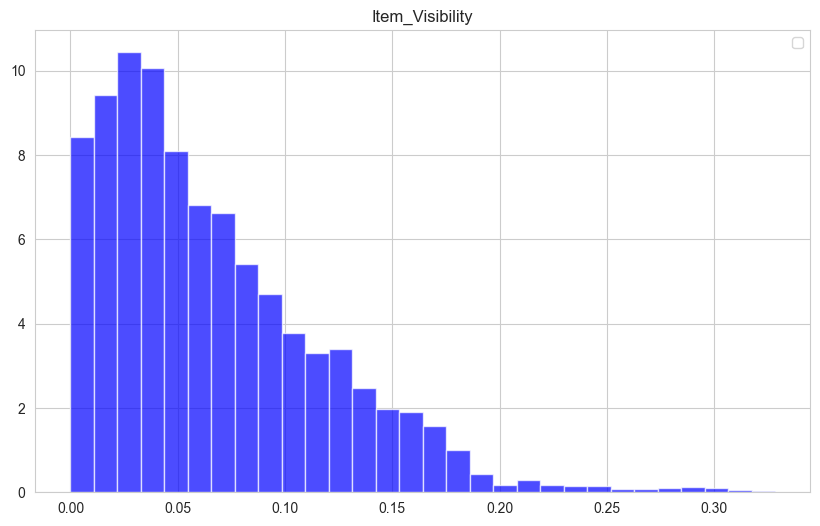

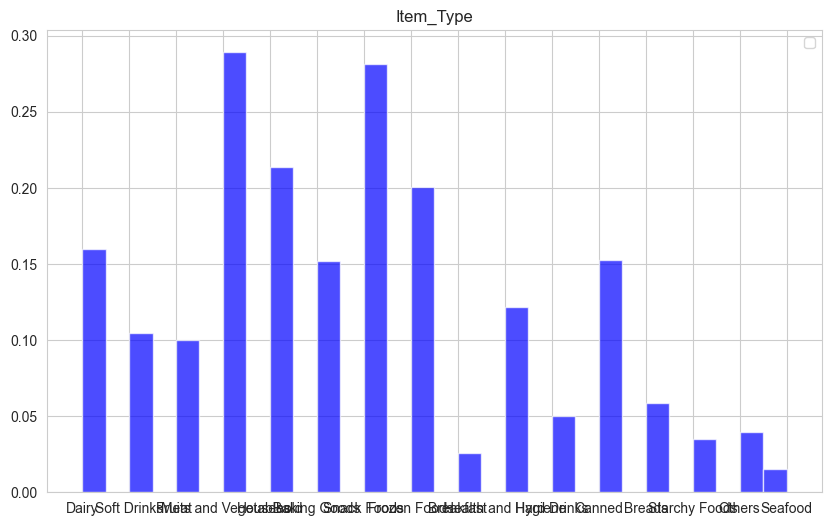

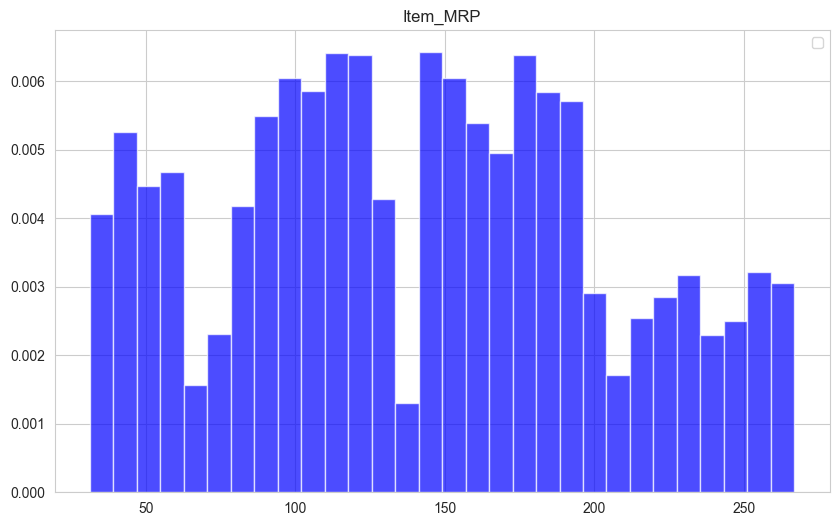

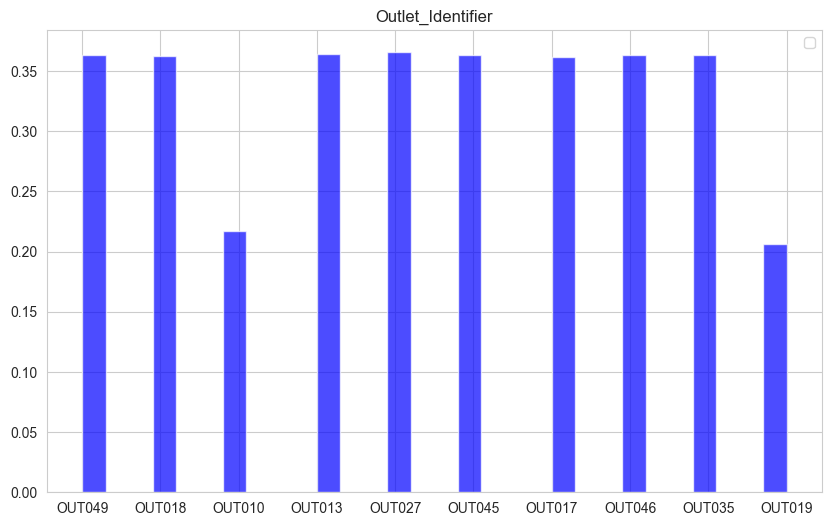

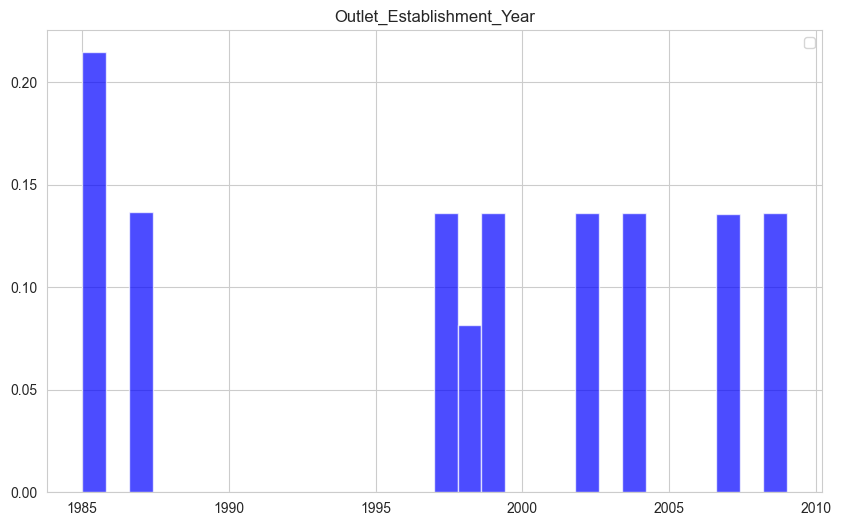

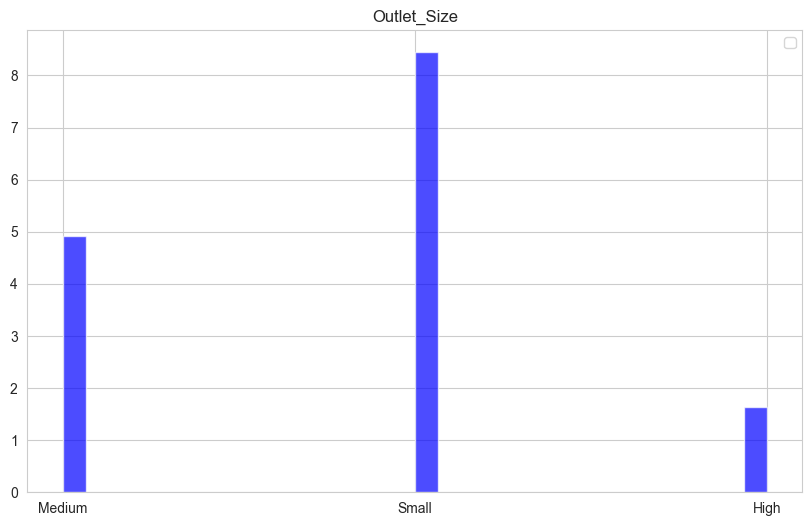

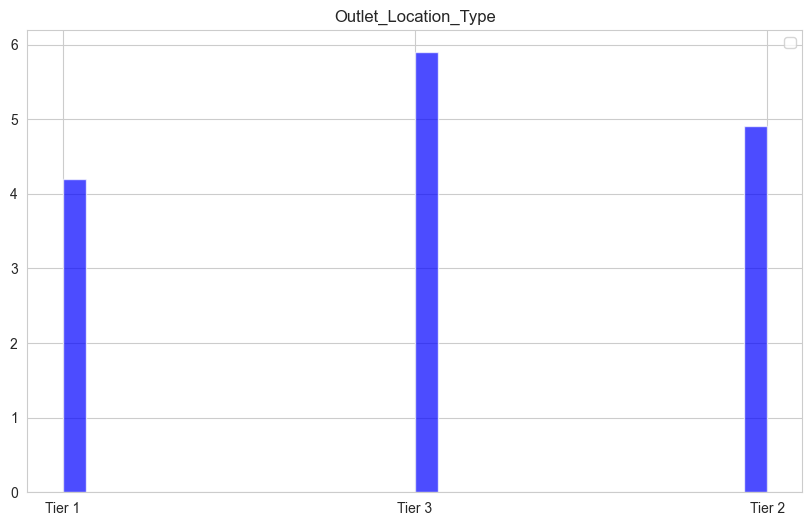

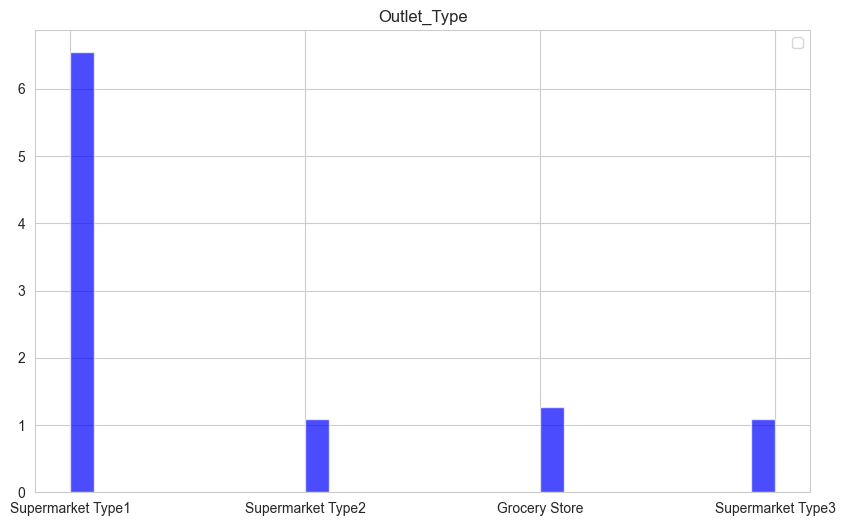

In [130]:
cols=df.columns
for label in cols[:-1]:
    plt.figure(figsize=(10, 6))
    plt.hist(df[label], color='blue', alpha=0.7, density=True, bins=30)
    plt.title(label)
    plt.legend()
    plt.show()


In [131]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [132]:
df['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular','regular':'Regular'}, inplace=True)
df['Item_Fat_Content'].unique()

/var/folders/73/mpjtryh12nj3xz35btdcvkwr0000gn/T/ipykernel_68662/2569700241.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular','regular':'Regular'}, inplace=True)


array(['Low Fat', 'Regular'], dtype=object)

/var/folders/73/mpjtryh12nj3xz35btdcvkwr0000gn/T/ipykernel_68662/670367572.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=df, palette='Set2')


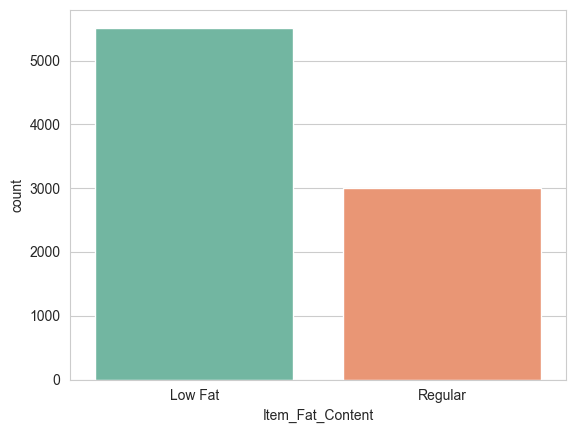

In [133]:
sns.countplot(x='Item_Fat_Content', data=df, palette='Set2')
plt.show()

/var/folders/73/mpjtryh12nj3xz35btdcvkwr0000gn/T/ipykernel_68662/1180115185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size', data=df, palette='Set2')


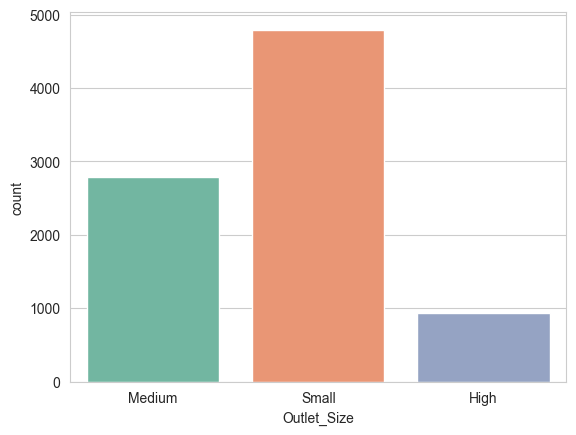

In [134]:
sns.countplot(x='Outlet_Size', data=df, palette='Set2')
plt.show()

In [135]:

from sklearn.preprocessing import LabelEncoder

In [136]:
encoder = LabelEncoder()
columns_to_encode = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                     'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in columns_to_encode:
   df[col] = encoder.fit_transform(df[col])


In [137]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [138]:
# # Example: Decoding the 'Outlet_Type' column
# df['Outlet_Type_Decoded'] = encoder.inverse_transform(df['Outlet_Type'])
# df[['Outlet_Type', 'Outlet_Type_Decoded']].head()

In [139]:
x = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [140]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [141]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [142]:
x.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [143]:
y.isnull().sum()

np.int64(0)

In [144]:
from sklearn.model_selection import train_test_split

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=60)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5966, 11), (2557, 11), (5966,), (2557,))

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


xgb_model = XGBRegressor(random_state=62)


grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                
    scoring='r2',          
    verbose=1,
    n_jobs=-1                # Use all CPU cores
)


grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

train_r2_train = r2_score(y_train, y_pred_train)
train_r2_test = r2_score(y_test, y_pred_test)
print("Train R²:", train_r2_train)
print("Test R²:", train_r2_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Train R²: 0.6206932062163125
Test R²: 0.6226304301125273


In [166]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from scipy.stats import uniform, randint


param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}


xgb_model = XGBRegressor(random_state=42)


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,              
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


random_search.fit(x_train, y_train)


best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)


train_r2_train = r2_score(y_train, y_pred_train)
train_r2_test = r2_score(y_test, y_pred_test)
print("Train R²:", train_r2_train)
print("Test R²:", train_r2_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'colsample_bytree': np.float64(0.8270801311279966), 'learning_rate': np.float64(0.019393987736667576), 'max_depth': 4, 'n_estimators': 267, 'subsample': np.float64(0.7799016533479063)}
Train R²: 0.6258057288182591
Test R²: 0.6228526076459069
